In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "registro"]
notas.head()

,usuarioId,filmeId,nota,registro
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
print(notas['nota'].mean())
print(notas['nota'].median())

3.501556983616962
3.5


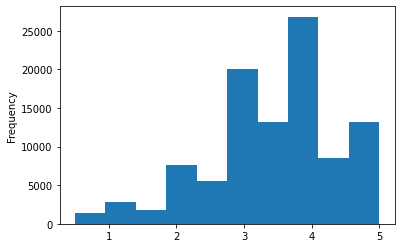

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


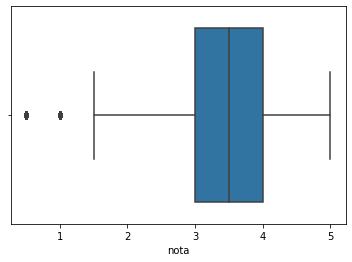

In [ ]:
sns.boxplot(notas.nota)

In [ ]:
filmes = pd.read_csv("movies.csv")

In [ ]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print(notas.query("filmeId==1"))
print("--------------------------------------------------- \n")
print(notas.query("filmeId==1").nota)

       usuarioId  filmeId  nota    registro
0              1        1   4.0   964982703
516            5        1   4.0   847434962
874            7        1   4.5  1106635946
1434          15        1   2.5  1510577970
1667          17        1   4.5  1305696483
...          ...      ...   ...         ...
97364        606        1   2.5  1349082950
98479        607        1   4.0   964744033
98666        608        1   2.5  1117408267
99497        609        1   3.0   847221025
99534        610        1   5.0  1479542900

[215 rows x 4 columns]
--------------------------------------------------- 

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64


In [ ]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

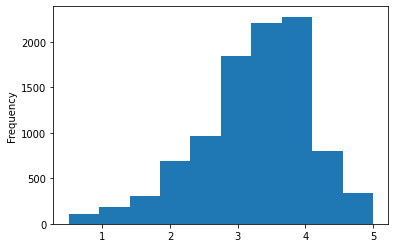

In [ ]:
medias_por_filme.plot(kind="hist")

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


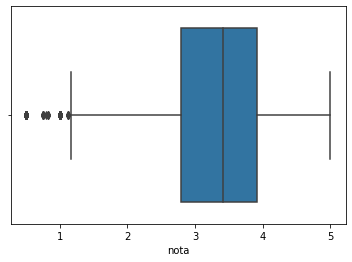

In [ ]:
sns.boxplot(medias_por_filme)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


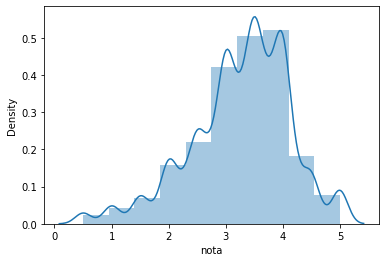

In [ ]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

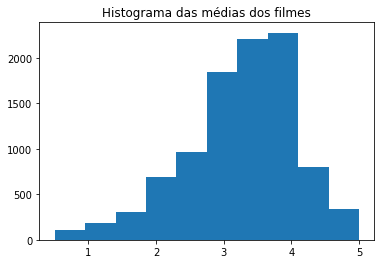

In [ ]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# Utilizando o datast do TMDB 5000 movies


In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


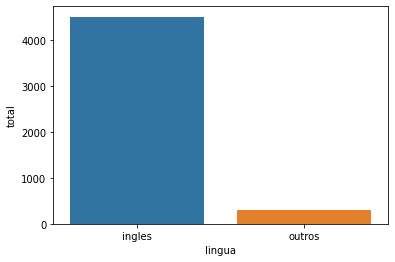

In [ ]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data = dados)

([<matplotlib.patches.Wedge at 0x7fcd2398d0f0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

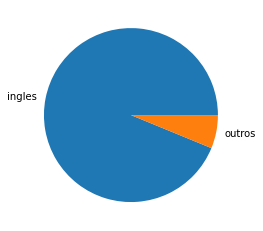

In [ ]:
plt.pie(dados["total"], labels = dados["lingua"])

In [ ]:
total_por_lingua_outros = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_outros

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
id     2
ar     2
ta     2
ro     2
cs     2
pl     1
el     1
no     1
ky     1
xx     1
ps     1
vi     1
af     1
te     1
is     1
hu     1
nb     1
tr     1
sl     1
Name: original_language, dtype: int64

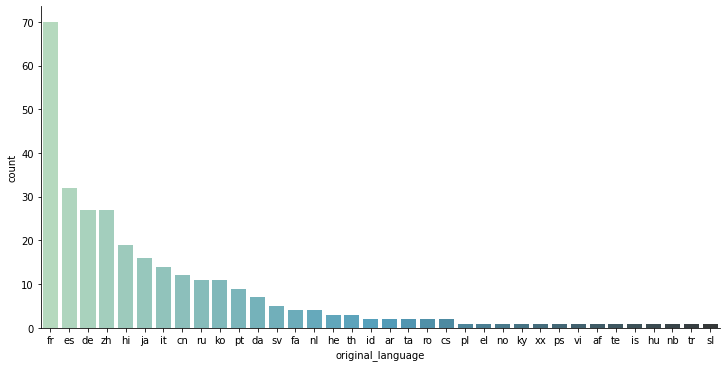

In [ ]:
filmes_outras_linguas= tmdb.query("original_language != 'en'")
plt.figure
sns.catplot(x = "original_language", 
            kind="count",
            data = filmes_outras_linguas,
            aspect = 2,         
            palette = "GnBu_d",
            order = total_por_lingua_outros.index)

# Medidas de tendência central e dispersão

In [46]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
notas_toy_story = notas.query("filmeId==1")
notas_jumanji = notas.query("filmeId==2")

print(notas_toy_story)
print("-" * 50)
print(notas_jumanji)

       usuarioId  filmeId  nota    registro
0              1        1   4.0   964982703
516            5        1   4.0   847434962
874            7        1   4.5  1106635946
1434          15        1   2.5  1510577970
1667          17        1   4.5  1305696483
...          ...      ...   ...         ...
97364        606        1   2.5  1349082950
98479        607        1   4.0   964744033
98666        608        1   2.5  1117408267
99497        609        1   3.0   847221025
99534        610        1   5.0  1479542900

[215 rows x 4 columns]
--------------------------------------------------
       usuarioId  filmeId  nota    registro
560            6        2   4.0   845553522
1026           8        2   4.0   839463806
1773          18        2   3.0  1455617462
2275          19        2   3.0   965704331
2977          20        2   3.0  1054038313
...          ...      ...   ...         ...
95102        600        2   4.0  1237764627
95965        602        2   4.0   840875851
9

In [58]:
print("Nota média do Toy Story: %.2f" % notas_toy_story.nota.mean())
print("Nota média do Jumanji: %.2f" % notas_jumanji.nota.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [59]:
print("Nota mediana do Toy Story: %.2f" % notas_toy_story.nota.median())
print("Nota mediana do Jumanji: %.2f" % notas_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [62]:
print("Desvio padrão das notas do Toy Story: %.2f" % notas_toy_story.nota.std())
print("Desvio padrão das notas do Jumanji: %.2f" % notas_jumanji.nota.std())

Desvio padrão das notas do Toy Story: 0.83
Desvio padrão das notas do Jumanji: 0.88
